In [10]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
from collections import Counter
from PIL import Image
import random
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# 1. Read Data

In [11]:
data_path = r"Complete Food 2.v1i.voc\train"
data_path = os.path.abspath(data_path)

# 2. Dataset Analysis

## 2.1 Count number of images and annoations

In [12]:
images = glob.glob(os.path.join(data_path, "*.jpg"))

annotations = glob.glob(os.path.join(data_path, "*.xml"))
annotations = [r"\\?\{}".format(os.path.abspath(a)) for a in annotations]

if len(images) == len(annotations):
    print(f"total images {len(images)} == {len(annotations)} total annotations")
else:
    print(f"total images {len(images)} ≠ {len(annotations)} total annotations")

total images 46744 ≠ 46745 total annotations


## 2.2 Count unique images

In [13]:
image_basenames = set(os.path.splitext(os.path.basename(f))[0] for f in images)

In [14]:
annot_basenames = set(os.path.splitext(os.path.basename(f))[0] for f in annotations)

In [15]:
images_with_annotations  = image_basenames & annot_basenames

if len(images) == len(images_with_annotations):
    print(f"total images {len(images)} == {len(images_with_annotations)} unique images")

total images 46744 == 46744 unique images


# 3. Image Analysis

## 3.1 Distribution of image resolutions

In [16]:
widths = []
heights = []
ratios = []

for img_path in images:
    try:
        with Image.open(img_path) as im:
            w, h = im.size
            widths.append(w)
            heights.append(h)
            ratios.append(round(w / h, 2))
    except:
        continue

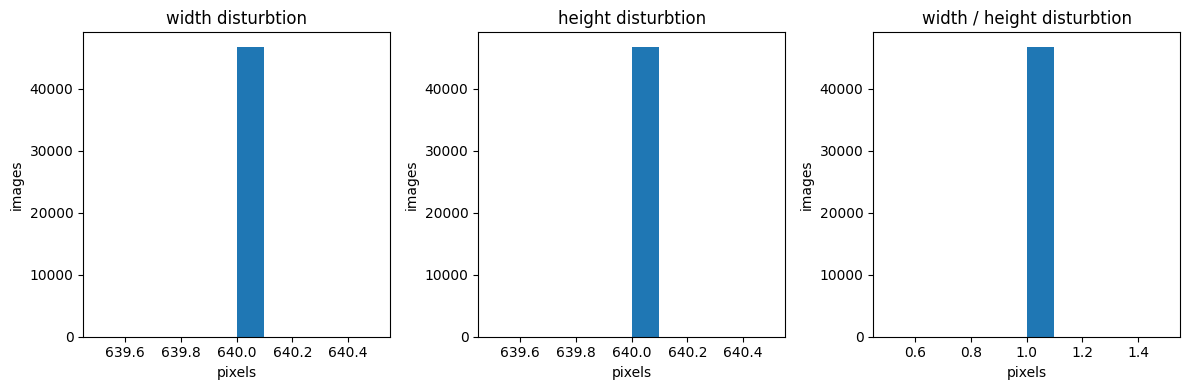

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(widths)
plt.title('width disturbtion')
plt.xlabel('pixels')
plt.ylabel('images')

plt.subplot(1,3,2)
plt.hist(heights)
plt.title('height disturbtion')
plt.xlabel('pixels')
plt.ylabel('images')

plt.subplot(1,3,3)
plt.hist(ratios)
plt.title('width / height disturbtion')
plt.xlabel('pixels')
plt.ylabel('images')

plt.tight_layout()
plt.show()

# 4. Class analysis

## 4.1 Process Classes

In [18]:
all_classes = []

for ann in annotations:
    tree = ET.parse(ann)
    root = tree.getroot()
    for obj in root.findall("object"):
        all_classes.append(obj.find("name").text.strip())

## 4.2 Count Objects Per Class

In [19]:
class_counts = Counter(all_classes)
df_classes = pd.DataFrame(class_counts.items(), columns=['class', 'count'])
df_classes = df_classes.sort_values(by='count', ascending=False).reset_index(drop=True)
df_classes

,class,count
0,Orange,11573
1,Apple,6520
2,Strawberry,5482
3,Tomato,5408
4,Grape,5027
...,...,...
209,Namprig,16
210,Laadna,15
211,bakso,14
212,Tom Yum,13


## 4.3 Top 50 Classes

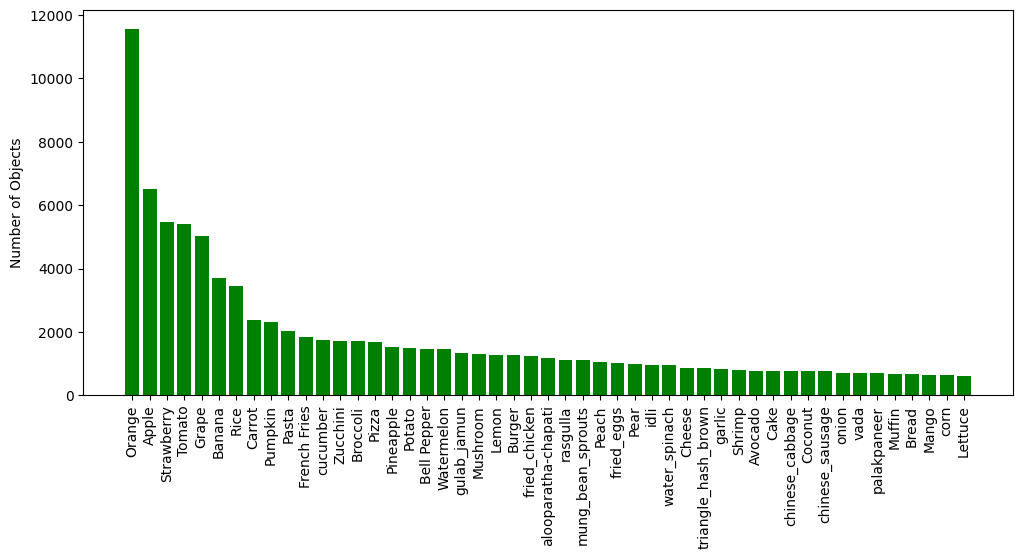

In [20]:
top10 = df_classes.head(49)
plt.figure(figsize=(12,5))
plt.bar(top10['class'], top10['count'], color='green')
plt.xticks(rotation=90)
plt.ylabel("Number of Objects")
plt.show()

## 4.4 Least 50 Classes

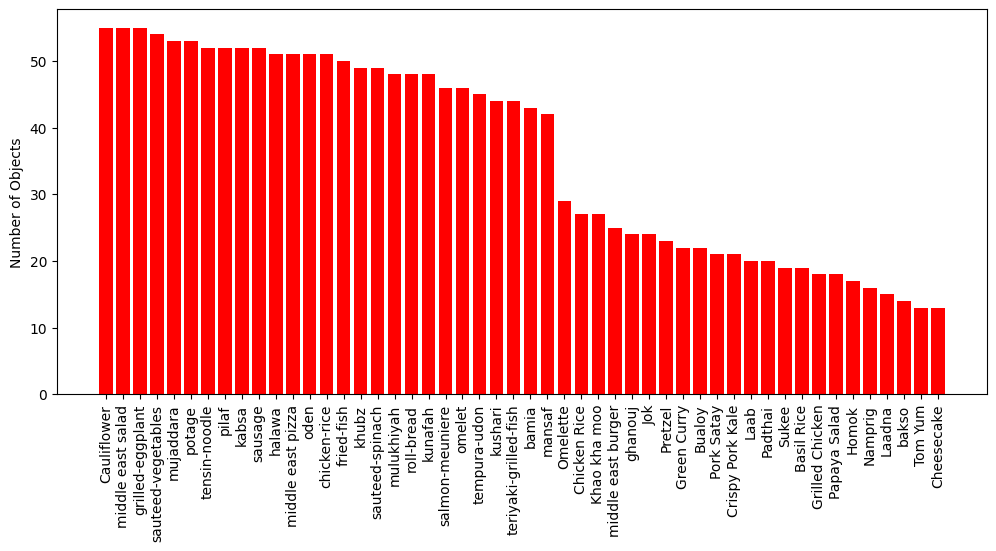

In [21]:
last10 = df_classes.tail(50)
plt.figure(figsize=(12,5))
plt.bar(last10['class'], last10['count'], color='red')
plt.xticks(rotation=90)
plt.ylabel("Number of Objects")
plt.show()

# 5. Visualizations

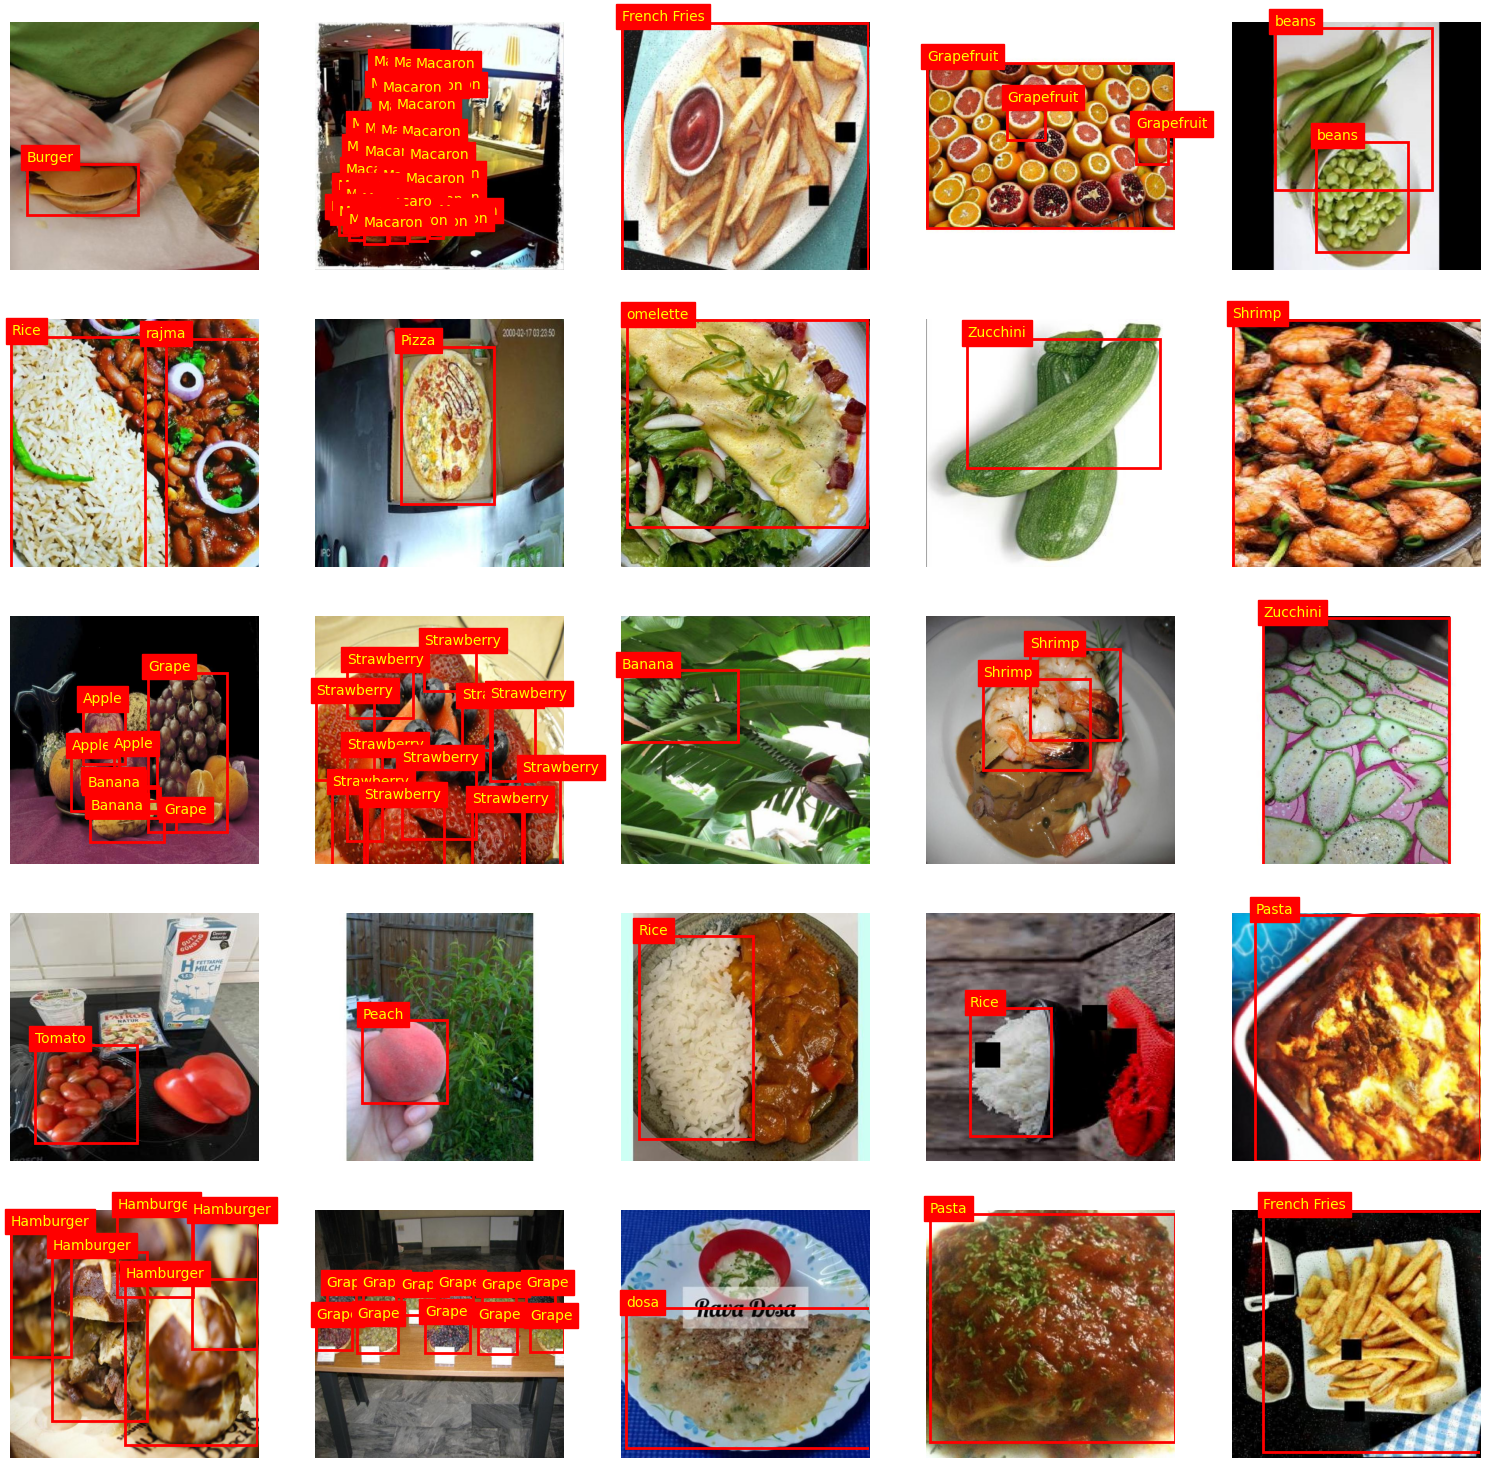

In [23]:
sample_files = random.sample(images, 25)

fig, axs = plt.subplots(5, 5, figsize=(15, 15))
axs = axs.flatten()

for ax, img_file in zip(axs, sample_files):
    img_path = os.path.join(data_path, img_file)
    xml_path = os.path.join(data_path, os.path.splitext(img_file)[0] + ".xml")
    
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')
    
    if os.path.exists(xml_path):
        tree = ET.parse(xml_path)
        root = tree.getroot()
        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            
            # Draw bounding box
            rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            
            # Put class name
            ax.text(xmin, ymin-5, name, color='yellow', fontsize=10, 
                    backgroundcolor='red')

plt.tight_layout()
plt.show()